In [17]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pandas as pd
import random
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from sklearn.decomposition import PCA
from pyclustering.samples.definitions import FCPS_SAMPLES
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#function to load the data of population dataset
def loadData():
    df = pd.read_csv('population.csv', sep=",", index_col=False)
    df = df.sample(frac=1).reset_index(drop=True)
    
    toRemove=[]
    for i in df.columns:
        df.loc[df[i] == ' ?', i] = np.nan
        if(df[i].isna().sum()/len(df)>0.4):
            toRemove.append(i)
    print("Columns removed",toRemove) 
    for i in toRemove:
        df=df.drop(i,1)
        
    return df

In [66]:
populationData=loadData()

Columns removed ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']


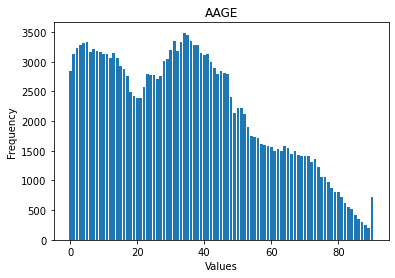

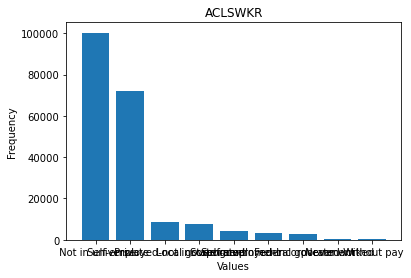

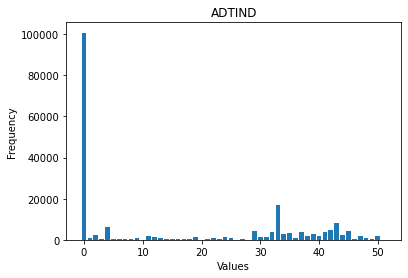

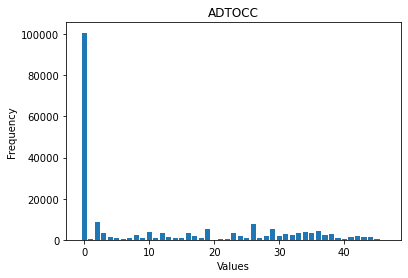

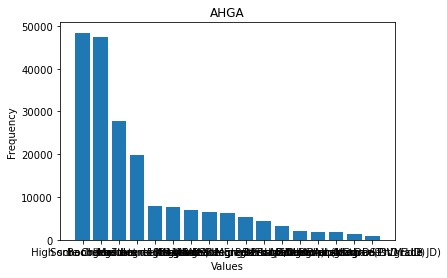

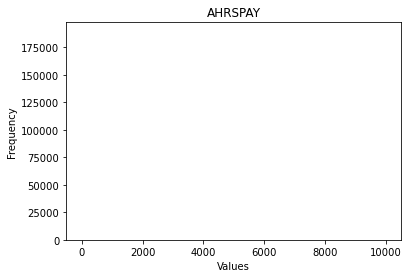

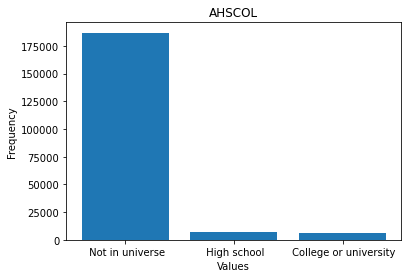

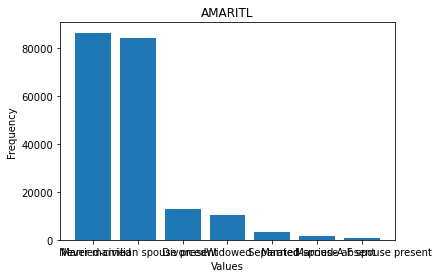

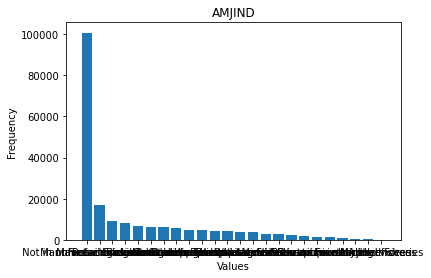

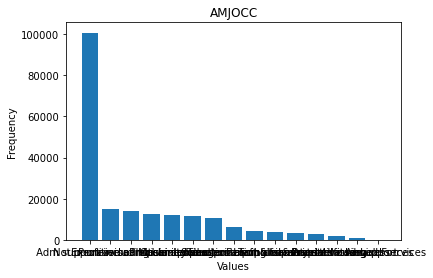

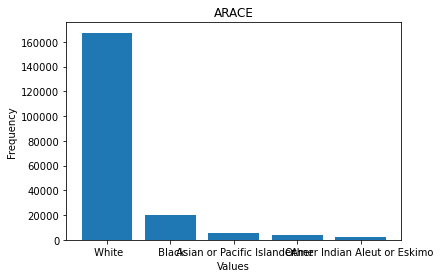

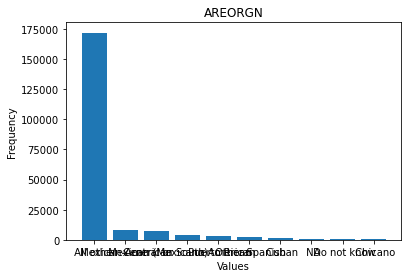

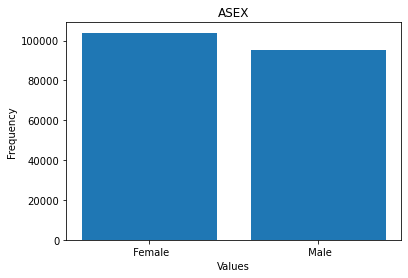

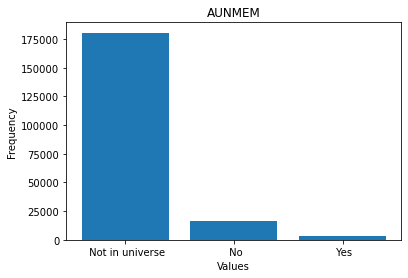

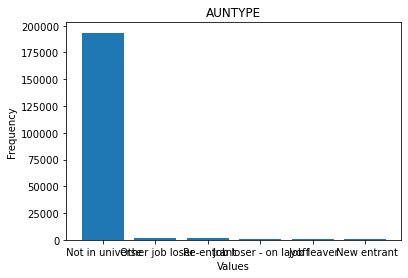

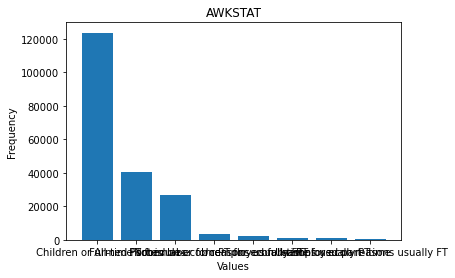

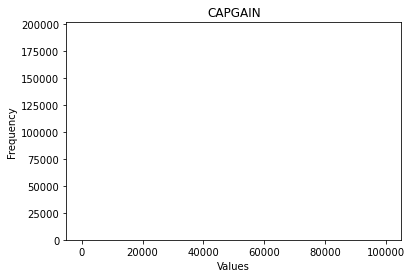

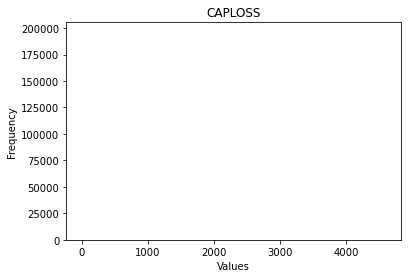

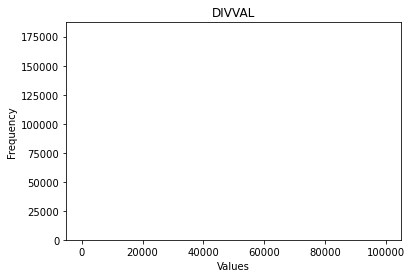

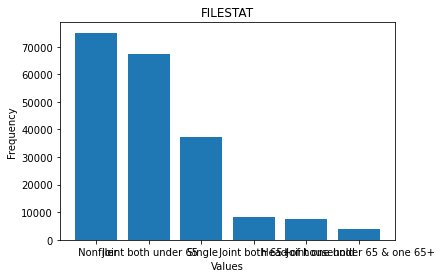

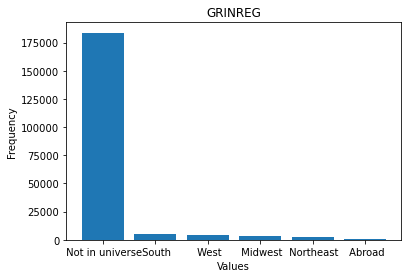

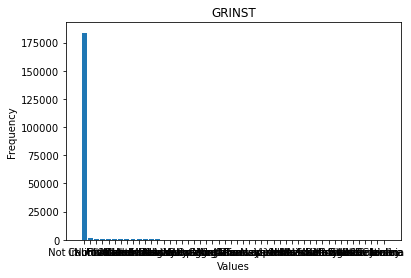

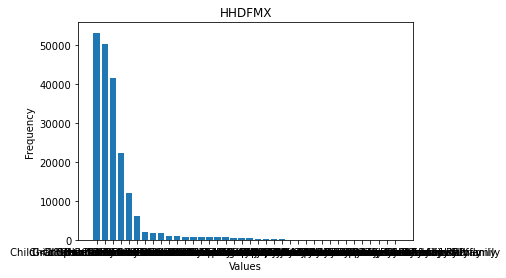

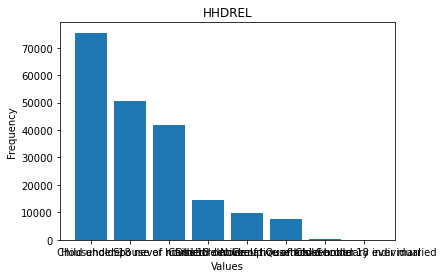

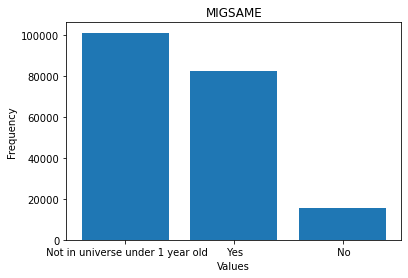

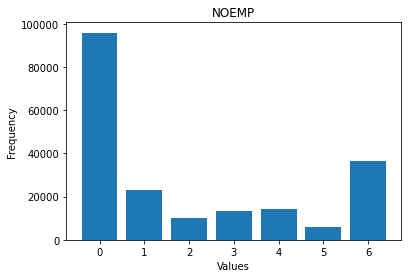

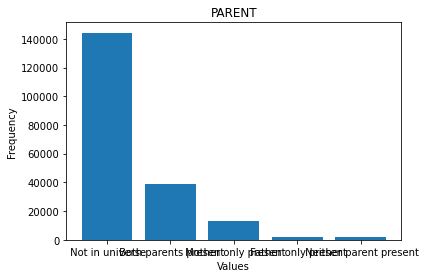

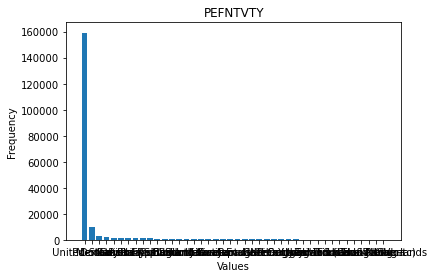

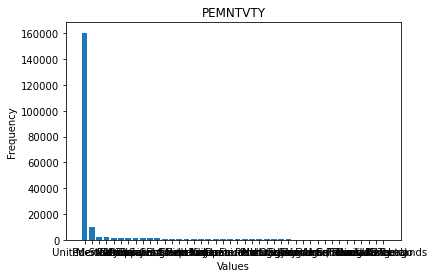

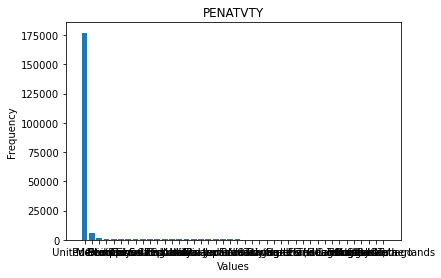

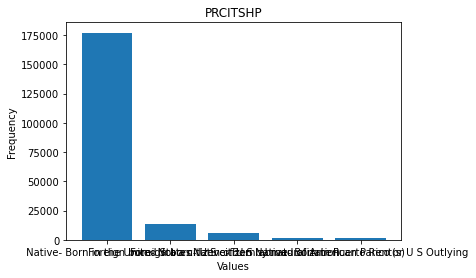

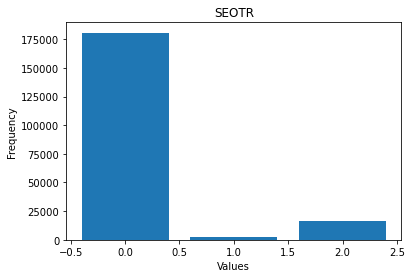

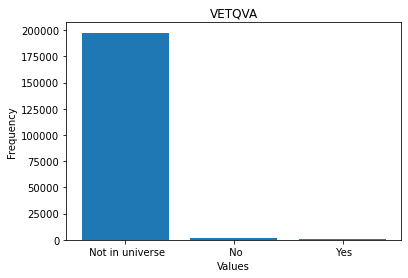

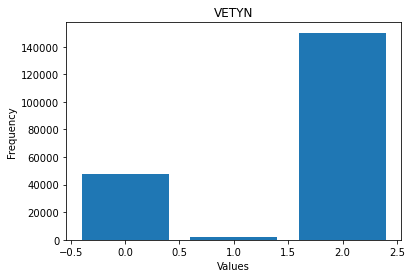

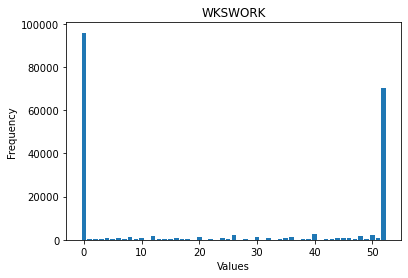

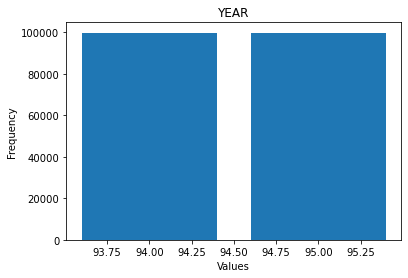

In [4]:
#plotting histogram
for i in populationData.columns:
    freq=populationData[i].value_counts()
    values=[]
    frequency=[]
    for j in freq.index:
        values.append(j)
        frequency.append(freq[j])
#     width = np.diff(values).min()
    plt.bar(values,frequency,align='center')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(i)
    plt.show()
#     print("Above graph's x axis values are ",values)

In [67]:
#droping features having more than 80% of the frequency in one feature only
toRemove=[]
for i in populationData.columns:
    freq=populationData[i].value_counts()
    maxNum=0
    total=0
    for j in freq.index:
        maxNum=max(freq[j],maxNum)
        total+=freq[j]
    if(maxNum/total>0.8):
        toRemove.append(i)
        populationData=populationData.drop(i,1)

print("Columns removed are ",toRemove)
print(populationData.shape)
    

Columns removed are  ['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA']
(199523, 19)


In [68]:
modeOfColumns={} #calculating mode of columns and storing for later use

for i in populationData.columns:
    
    mode=populationData[i].mode()
    modeOfColumns[i]=mode[0]
    populationData[i].fillna(mode[0],inplace=True)

In [49]:
print(modeOfColumns)

{'AAGE': 34.0, 'ACLSWKR': ' Not in universe', 'ADTIND': 0.0, 'ADTOCC': 0.0, 'AHGA': ' High school graduate', 'AHRSPAY': 0.0, 'AHSCOL': ' Not in universe', 'AMARITL': ' Never married', 'AMJIND': ' Not in universe or children', 'AMJOCC': ' Not in universe', 'ARACE': ' White', 'AREORGN': ' All other', 'ASEX': ' Female', 'AUNMEM': ' Not in universe', 'AUNTYPE': ' Not in universe', 'AWKSTAT': ' Children or Armed Forces', 'CAPGAIN': 0.0, 'CAPLOSS': 0.0, 'DIVVAL': 0.0, 'FILESTAT': ' Nonfiler', 'GRINREG': ' Not in universe', 'GRINST': ' Not in universe', 'HHDFMX': ' Householder', 'HHDREL': ' Householder', 'MIGSAME': ' Not in universe under 1 year old', 'NOEMP': 0.0, 'PARENT': ' Not in universe', 'PEFNTVTY': ' United-States', 'PEMNTVTY': ' United-States', 'PENATVTY': ' United-States', 'PRCITSHP': ' Native- Born in the United States', 'SEOTR': 0.0, 'VETQVA': ' Not in universe', 'VETYN': 2.0, 'WKSWORK': 0.0, 'YEAR': 94.0}


In [69]:
#bucketize
numericalColumns=['AAGE','WKSWORK']

for i in populationData.columns:
    if(i in numericalColumns):
        labels = ['lowest','low','neutral','high','highest']    #1 being the lowest and 5 being the  highest
        populationData[i+'Binned']=pd.cut(populationData[i],bins=5,precision=0,labels=labels)
#         print(populationData[i+"Binned"].value_counts())
        populationData=populationData.drop(i,1)

In [70]:
#one hot encode
# y = pd.get_dummies(df.Countries, prefix='Country')
for i in populationData.columns:
    if(len(populationData[i].value_counts().index)==2):
        oneHot=pd.get_dummies(populationData[i], prefix=i)
        
        populationData = pd.concat([populationData, oneHot[oneHot.columns[0]]], axis=1)
        populationData = populationData.drop(i,1)
        continue
    oneHot=pd.get_dummies(populationData[i], prefix=i)
    populationData = pd.concat([populationData, oneHot], axis=1)
    populationData = populationData.drop(i,1)
print(populationData.head(10))


   ACLSWKR_ Federal government  ACLSWKR_ Local government  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
5                            0                          0   
6                            0                          0   
7                            0                          0   
8                            0                          0   
9                            0                          0   

   ACLSWKR_ Never worked  ACLSWKR_ Not in universe  ACLSWKR_ Private  \
0                      0                         0                 1   
1                      0                         0                 0   
2                      0                         1                 0   
3                      0                

0.7868609850403266 25
0.7931902659501615 26
0.7991387463290951 27
0.8048216486325457 28
0.810588241160207 29
0.8161146606794878 30
0.8213638463038773 31
0.8263020763139118 32
0.830949040638882 33
0.835472778641344 34
0.8400900797127079 35
0.8443556242018675 36
0.8489217698467385 37
0.8531943980212466 38
0.8569797066454289 39
0.8609142673230397 40
0.864708005858684 41
0.8685483587274695 42
0.872041371033711 43
0.875485975021521 44
0.8789091146345499 45


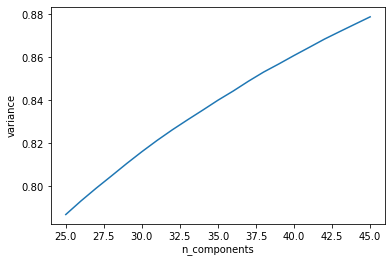

In [23]:
#PCA
variance=[]
for i in range(25,46):
    pca = PCA(n_components = i, random_state = 0)
    pca.fit(populationData)
    variance.append(np.sum(pca.explained_variance_ratio_))
    print(variance[-1],i)
#     pcaData = pd.DataFrame(pca.fit_transform(populationData))
plt.plot(range(25,46),variance)
plt.xlabel("n_components")
plt.ylabel("variance")
plt.show()


In [86]:
#choosing n_components=38 as we first got 85+ variance there
pcaPopulation = PCA(n_components = 38, random_state = 0)
pcaData = pd.DataFrame(pcaPopulation.fit_transform(populationData))

In [25]:
print(pcaData.shape)

(199523, 38)


In [26]:
#clustering 

loss=[]
for i in range(10,25):
    print("currently at k =",i)
    randomNums = np.random.choice(len(pcaData),i,replace=False)
    medianInit=pcaData.loc[randomNums]
    kmedians_instance=kmedians(pcaData, medianInit)
    kmedians_instance.process()
    clusters=kmedians_instance.get_clusters()
    medians=kmedians_instance.get_medians()
    lossAtK=(kmedians_instance.get_total_wce()/i)
    loss.append(lossAtK)


currently at k = 10
currently at k = 11
currently at k = 12
currently at k = 13
currently at k = 14
currently at k = 15
currently at k = 16
currently at k = 17
currently at k = 18
currently at k = 19
currently at k = 20
currently at k = 21
currently at k = 22
currently at k = 23
currently at k = 24


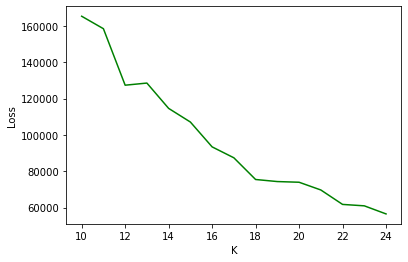

In [27]:
plt.plot(range(10,25),loss,'g')
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

In [72]:
#by elbow in graph we get best k as 12
bestK=12
randomNums = np.random.choice(len(pcaData),bestK,replace=False)
medianInit=pcaData.loc[randomNums]
kmedians_instance=kmedians(pcaData, medianInit)
kmedians_instance.process()
clustersPopulation=kmedians_instance.get_clusters()
mediansPopulation=kmedians_instance.get_medians()
lossAtK=(kmedians_instance.get_total_wce()/bestK)
print("Loss we get for chosen best k = ",lossAtK)

Loss we get for chosen best k =  131008.8133182142


In [ ]:
#Part 5

In [29]:
#function to load the data of more_than_50k dataset 
def loadDataMore():
    df = pd.read_csv('more_than_50k.csv', sep=",", index_col=False)
    df = df.sample(frac=1).reset_index(drop=True)
    
    toRemove=[]
    for i in df.columns:
        df.loc[df[i] == ' ?', i] = np.nan
        if(df[i].isna().sum()/len(df)>0.4):
            toRemove.append(i)
    print("Columns removed",toRemove) 
    for i in toRemove:
        df=df.drop(i,1)
        
    return df

In [43]:
moreData=loadDataMore()

Columns removed ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']


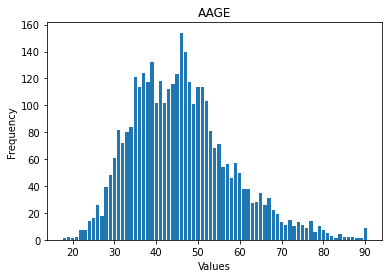

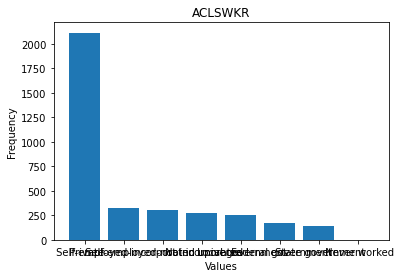

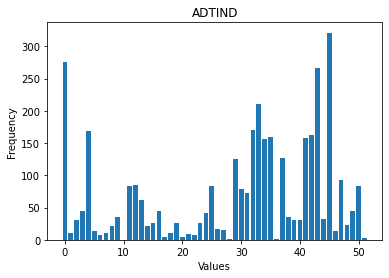

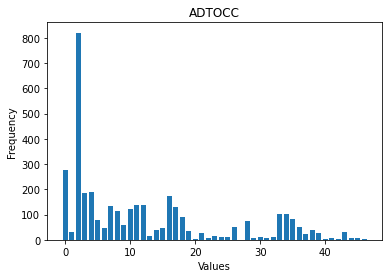

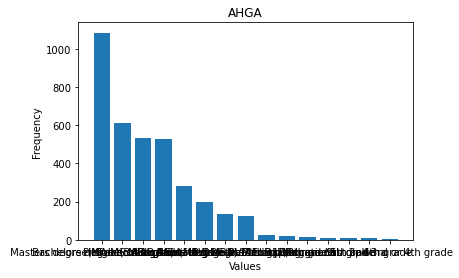

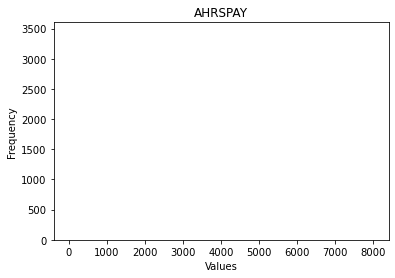

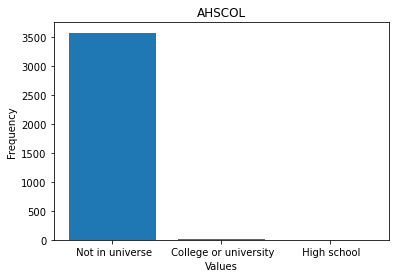

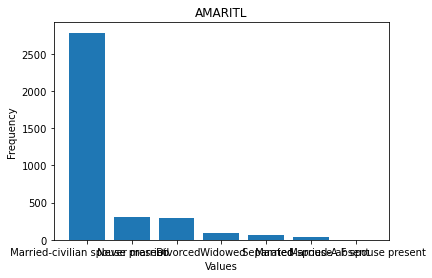

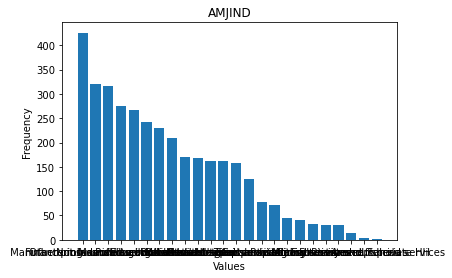

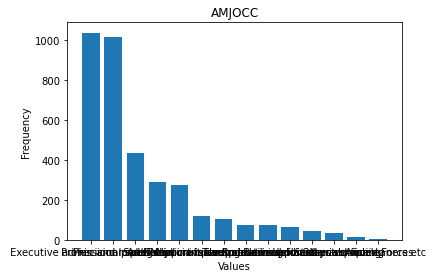

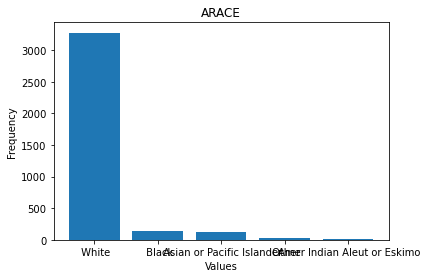

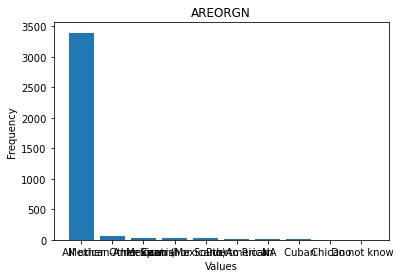

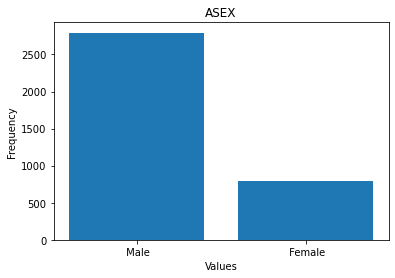

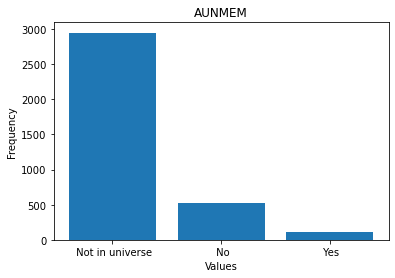

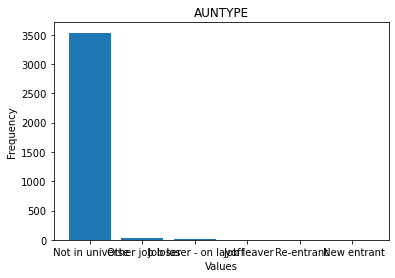

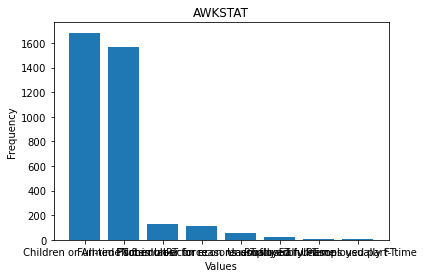

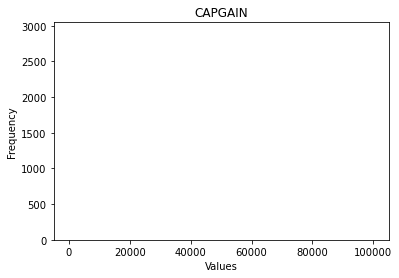

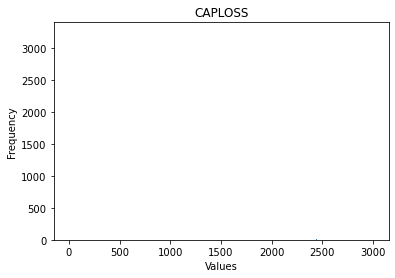

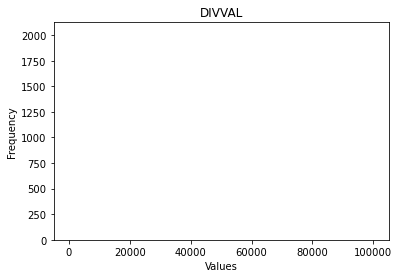

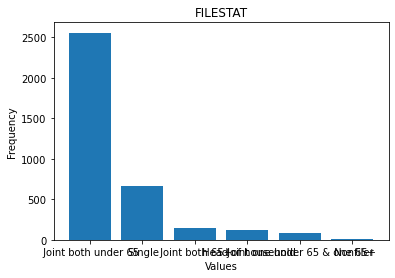

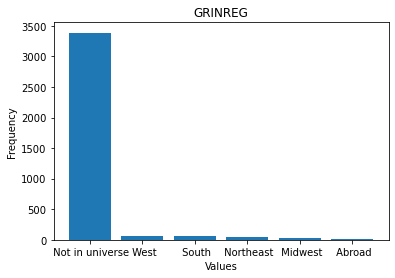

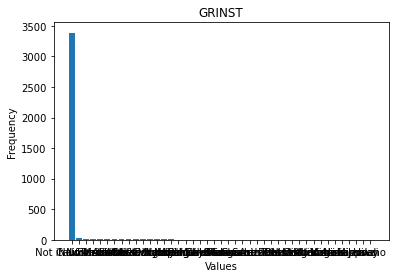

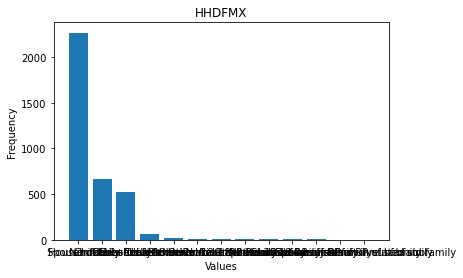

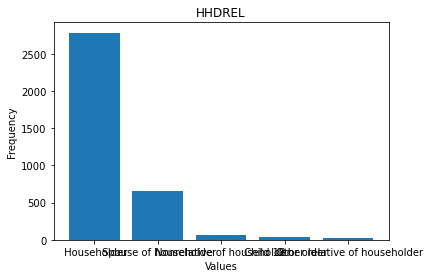

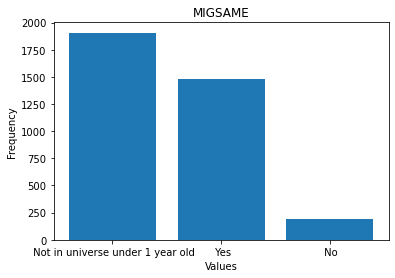

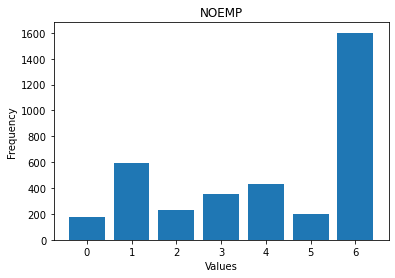

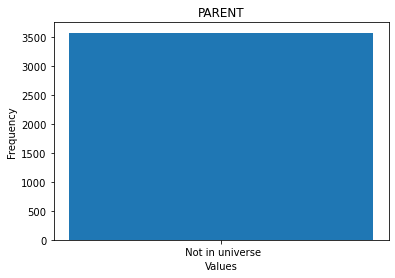

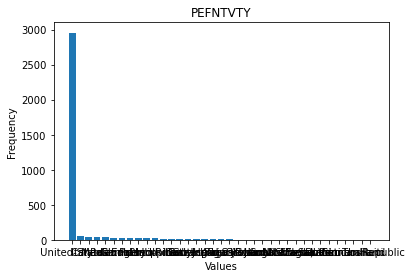

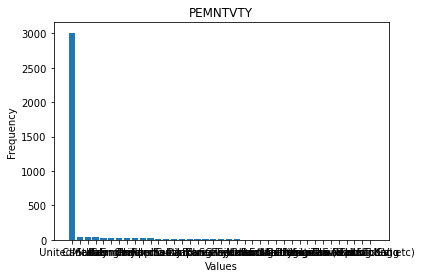

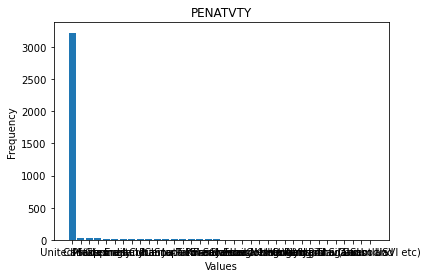

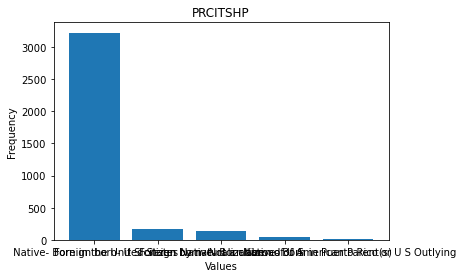

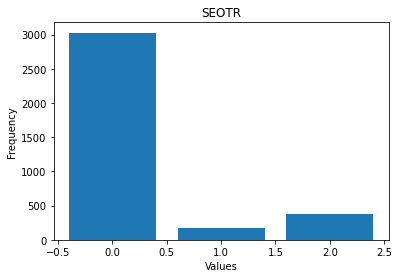

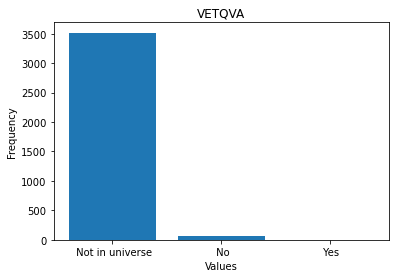

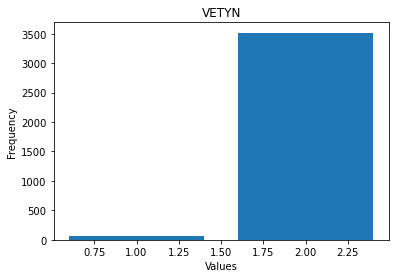

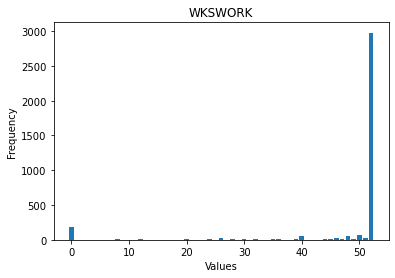

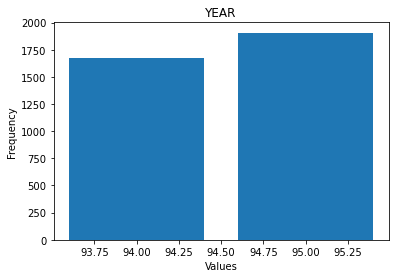

In [44]:
#plotting histogram
for i in moreData.columns:
    freq=moreData[i].value_counts()
    values=[]
    frequency=[]
    for j in freq.index:
        values.append(j)
        frequency.append(freq[j])
    plt.bar(values,frequency,align='center')
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title(i)
    plt.show()

In [45]:
#droping features having more than 80% of the frequency in one feature only
toRemove=[]
for i in moreData.columns:
    freq=moreData[i].value_counts()
    maxNum=0
    total=0
    for j in freq.index:
        maxNum=max(freq[j],maxNum)
        total+=freq[j]
    if(maxNum/total>0.8):
        toRemove.append(i)
        moreData=moreData.drop(i,1)

print("Columns removed are ",toRemove)
print(moreData.shape)

Columns removed are  ['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'GRINREG', 'GRINST', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK']
(3580, 17)


In [50]:
#replacing with mode values calculated earlier
for i in moreData.columns:
    moreData[i].fillna(modeOfColumns[i],inplace=True)

In [56]:
#bucketize
numericalColumns=['AAGE','WKSWORK','DIVVAL']

for i in moreData.columns:
    if(i in numericalColumns):
        labels = ['lowest','low','neutral','high','highest']    #1 being the lowest and 5 being the  highest
        moreData[i+'Binned']=pd.cut(moreData[i],bins=5,precision=0,labels=labels)
        moreData=moreData.drop(i,1)

In [57]:
#one hot encode
for i in moreData.columns:
    if(len(moreData[i].value_counts().index)==2):
        oneHot=pd.get_dummies(moreData[i], prefix=i)
        
        moreData = pd.concat([moreData, oneHot[oneHot.columns[0]]], axis=1)
        moreData = moreData.drop(i,1)
        continue
    oneHot=pd.get_dummies(moreData[i], prefix=i)
    moreData = pd.concat([moreData, oneHot], axis=1)
    moreData = moreData.drop(i,1)
print(moreData.head(10))

   ACLSWKR_ Federal government_0  ACLSWKR_ Local government_0  \
0                              1                            0   
1                              1                            1   
2                              1                            1   
3                              1                            1   
4                              1                            1   
5                              1                            1   
6                              1                            1   
7                              1                            1   
8                              1                            1   
9                              1                            1   

   ACLSWKR_ Never worked_0  ACLSWKR_ Not in universe_0  ACLSWKR_ Private_0  \
0                        1                           1                   1   
1                        1                           1                   1   
2                        1                        

0.7030924211447905 25
0.7120326178055528 26
0.7207043275469546 27
0.72906463420493 28
0.7371381371548159 29
0.7449302843581788 30
0.7523226824499466 31
0.7598016980054241 32
0.7670808573055432 33
0.7738777202379299 34
0.7805570454929855 35
0.7870106500890895 36
0.7933185076204302 37
0.7995237776299805 38
0.8054226312321284 39
0.8112518443532133 40
0.8164833887208982 41
0.821400255501987 42
0.8260105345471782 43
0.8304009914635885 44
0.8346779305570715 45
0.8388951845604065 46
0.8428665925479539 47
0.8466991495701068 48
0.8504420352501342 49
0.8542413552243833 50
0.8578881597712329 51
0.8610562441812715 52
0.8645540536003337 53
0.8675960491866652 54


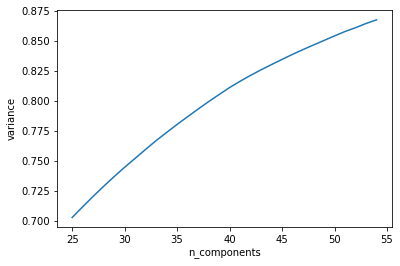

In [58]:
#PCA
variance=[]
for i in range(25,55):
    pca = PCA(n_components = i, random_state = 0)
    pca.fit(moreData)
    variance.append(np.sum(pca.explained_variance_ratio_))
    print(variance[-1],i)
#     pcaData = pd.DataFrame(pca.fit_transform(populationData))
plt.plot(range(25,55),variance)
plt.xlabel("n_components")
plt.ylabel("variance")
plt.show()

In [87]:
#choosing n_components=49 as we first got 85+ variance there
pcaMore = PCA(n_components = 49, random_state = 0)
pcaDataMore = pd.DataFrame(pcaMore.fit_transform(moreData))

In [60]:
#clustering 

loss=[]
for i in range(10,25):
    print("currently at k =",i)
    randomNums = np.random.choice(len(pcaData),i,replace=False)
    medianInit=pcaData.loc[randomNums]
    kmedians_instance=kmedians(pcaData, medianInit)
    kmedians_instance.process()
    clusters=kmedians_instance.get_clusters()
    medians=kmedians_instance.get_medians()
    lossAtK=(kmedians_instance.get_total_wce()/i)
    loss.append(lossAtK)

currently at k = 10
currently at k = 11
currently at k = 12
currently at k = 13
currently at k = 14
currently at k = 15
currently at k = 16
currently at k = 17
currently at k = 18
currently at k = 19
currently at k = 20
currently at k = 21
currently at k = 22
currently at k = 23
currently at k = 24


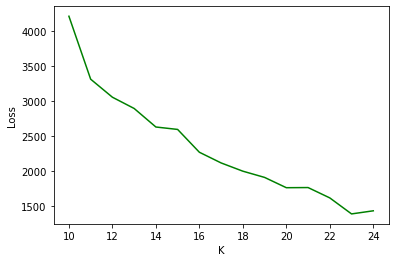

In [61]:
plt.plot(range(10,25),loss,'g')
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

In [64]:
#by elbow in graph we get best k as 14
bestK=14
randomNums = np.random.choice(len(pcaData),bestK,replace=False)
medianInit=pcaData.loc[randomNums]
kmedians_instance=kmedians(pcaData, medianInit)
kmedians_instance.process()
clustersMore=kmedians_instance.get_clusters()
mediansMore=kmedians_instance.get_medians()
lossAtK=(kmedians_instance.get_total_wce()/bestK)
print("Loss we get for chosen best k = ",lossAtK)

Loss we get for chosen best k =  2862.5274935632515


In [ ]:
#part 6

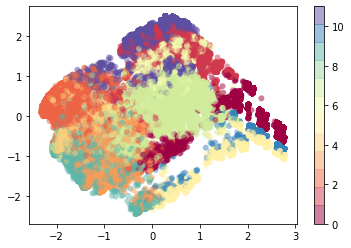

In [80]:
hashy = {}
for i in range(len(clustersPopulation)):
    for j in clustersPopulation[i]:
        hashy[j] = i

array = [0]*(len(hashy))
for i in hashy:
    array[i] = hashy[i]

plt.scatter(pcaData.to_numpy()[:,0],pcaData.to_numpy()[:,1],c = array, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap("Spectral",12))
plt.colorbar()

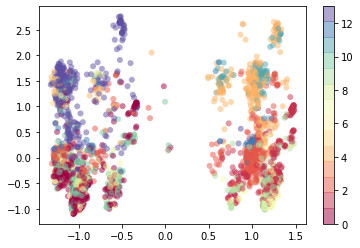

In [78]:
hashy = {}
for i in range(len(clustersMore)):
    for j in clustersMore[i]:
        hashy[j] = i

array = [0]*(len(hashy))
for i in hashy:
    array[i] = hashy[i]

plt.scatter(pcaDataMore.to_numpy()[:,0],pcaDataMore.to_numpy()[:,1],c = array, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap("Spectral",14))
plt.colorbar()

In [ ]:
#6.3

In [89]:
features = pd.DataFrame(pcaPopulation.components_,columns = populationData.columns).T
print(features[0].sort_values())


WKSWORKBinned_highest                 -0.204415
PARENT_ Not in universe               -0.202841
VETYN_2.0                             -0.186455
ACLSWKR_ Private                      -0.177803
FILESTAT_ Joint both under 65         -0.152651
                                         ...   
ACLSWKR_ Not in universe               0.240869
AMJIND_ Not in universe or children    0.241693
ADTIND_0.0                             0.241693
ADTOCC_0.0                             0.241693
AMJOCC_ Not in universe                0.241693
Name: 0, Length: 261, dtype: float64


In [ ]:
#6.4

In [90]:
features = pd.DataFrame(pcaMore.components_,columns = moreData.columns).T
print(features[0].sort_values())


YEAR_94.0_0                                   -0.457145
AWKSTAT_ Children or Armed Forces_0           -0.457050
MIGSAME_ Yes_0                                -0.421508
HHDFMX_ Householder_0                         -0.061504
HHDREL_ Householder_0                         -0.046422
                                                 ...   
HHDFMX_ Spouse of householder_0                0.034579
ASEX_ Female_0                                 0.037329
NOEMP_6.0_0                                    0.058043
AWKSTAT_ Full-time schedules_0                 0.408481
MIGSAME_ Not in universe under 1 year old_0    0.457145
Name: 0, Length: 516, dtype: float64
